# step1 : Import required libraries

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

# Step2 : Load the dataset

In [16]:
df=pd.read_csv('Mall_Customers .csv')

# Step 3: Data preprocessing

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
# check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# droping the column which is not required for our analysis
df.drop(columns=['CustomerID', 'Gender'], inplace=True, axis=1)

In [23]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Step 4: EDA

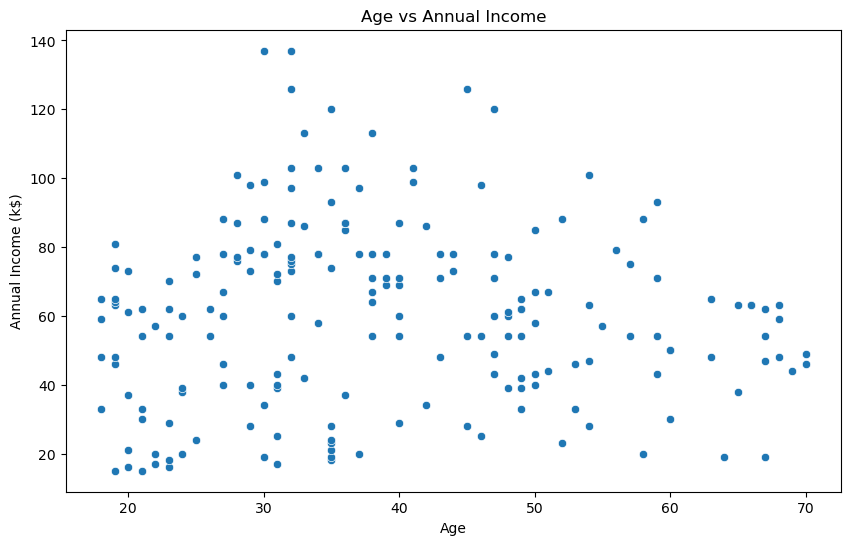

In [24]:
# display age and annual income scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

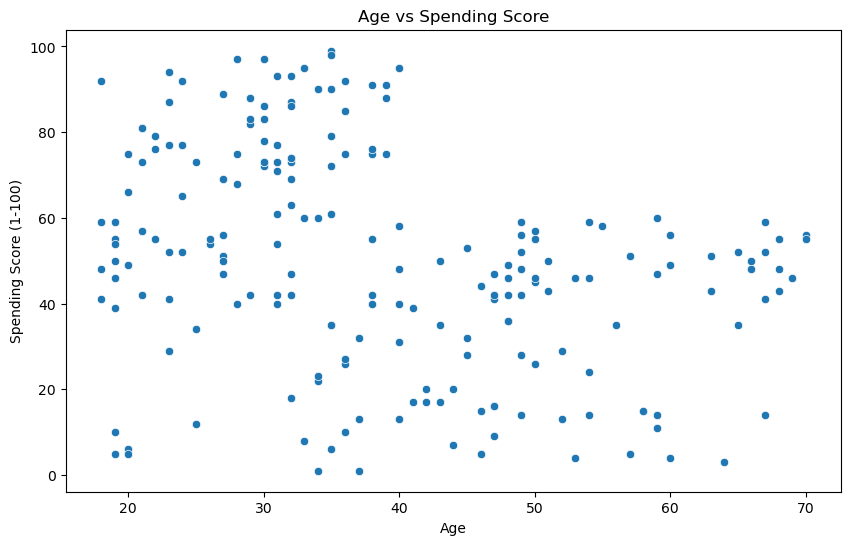

In [25]:
# display age and spending score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

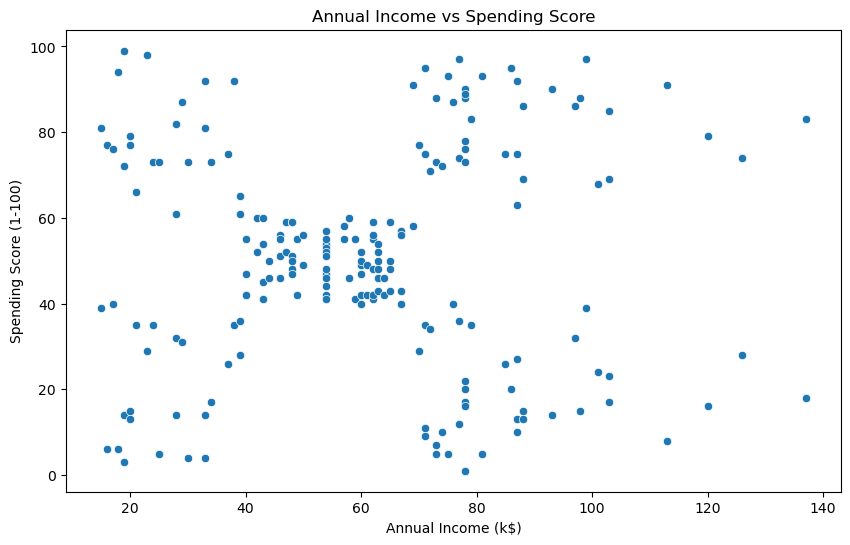

In [26]:
# display annual income and spending score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Step 5: Feature Engineering

In [30]:
# display skewness name normal,right skewed, left skewed
def skewness_name(skewness):
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"
# Find the skewness of the data and check whether the data is skewed or not which skewness is there
print("Skewness of Age:", skewness_name(df['Age'].skew()))
print("Skewness of Annual Income (k$):", skewness_name(df['Annual Income (k$)'].skew()))
print("Skewness of Spending Score (1-100):", skewness_name(df['Spending Score (1-100)'].skew()))

Skewness of Age: Right Skewed
Skewness of Annual Income (k$): Right Skewed
Skewness of Spending Score (1-100): Left Skewed


In [31]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df=pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Step 6: Train K-Mean model

In [33]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df['Cluster']=kmeans.labels_
df.head()

c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aksha\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

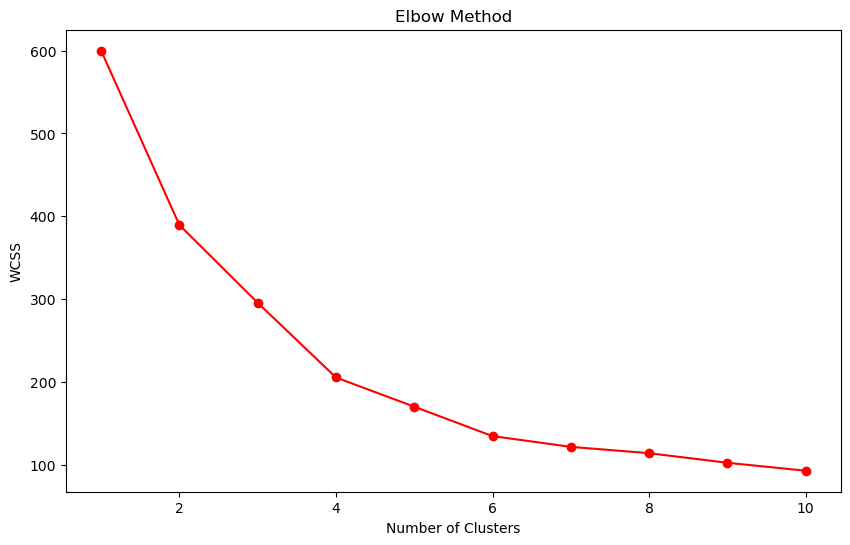

In [35]:
# check with elbow mwthod
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop('Cluster', axis=1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o',color='red')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

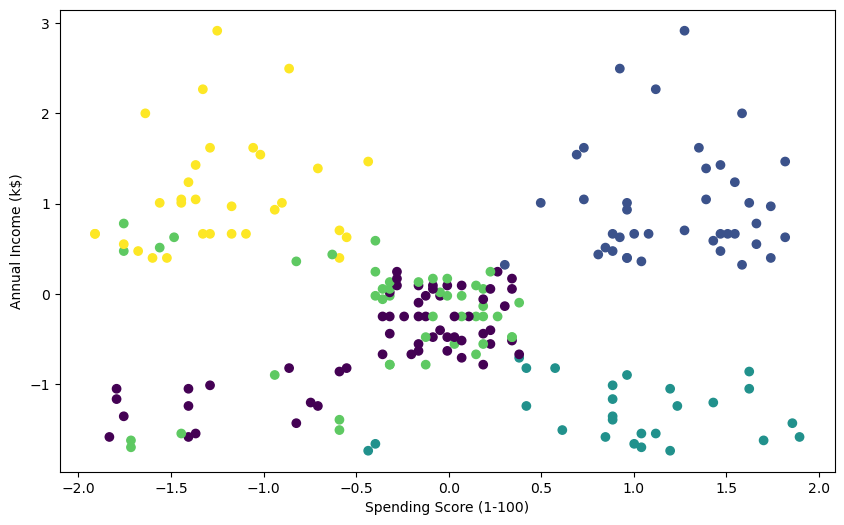

In [37]:
# display clusters 
plt.figure(figsize=(10,6))
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=df['Cluster'])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

In [38]:
# save the file
df.to_csv('clustered_mall_customers.csv', index=False)

In [39]:
# load cleaned dataset 
df=pd.read_csv('clustered_mall_customers.csv')

In [48]:
# check unique values in cluster column
print(df['Cluster'].unique())

[2 3 0 1 4]


In [40]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [41]:
x=df.drop('Cluster', axis=1)

In [42]:
y=df['Cluster']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [45]:
model=DecisionTreeClassifier(random_state=42)

In [46]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [53]:
print(' Decision tree Accuracy Score:', accuracy_score(y_test, y_pred))

 Decision tree Accuracy Score: 0.95


In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print('KNN Accuracy Score:', accuracy_score(y_test, y_pred_knn))

KNN Accuracy Score: 0.975


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print('Random Forest Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy Score: 1.0


In [54]:
import joblib
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']